# Задание

У каждого есть свой набор данный, который можно найти в ведомости на вкладке "Линейная регрессия":

https://clck.ru/32BVWe

Скачиваете свой датасет с kaggle (для этого нужно авторизоваться с гугл аккаунт и скачать датасет).

**Ваша задача:**
1. Исследовать данные
2. Создать тренировочную и тестовую подвыборки
3. Построить модель линейной регрессии по своему набору данных (т.е. создать модель и обучить ее на тренировочной выборке)
4. Получить коэффиценты уравнения линейной регрессии
5. Написать уравнение линейной регрессии
6. Визуализировать данные и полученное уравнение линейной регрессии
7. Оценивать полученную модель с помощью MSE, MAE, R2.
8. Сделать письменный вывод получившихся результатов (хорошая или плохая получлась оценка MSE и почему), привести восстановленное линейное уравнение регрессии, сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему.

In [ ]:
# Ваше решение

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [2]:
Data_f=pd.read_csv('Train.csv')
Data_f.loc[Data_f['Gender'] == 'F', 'Gender'] = 0
Data_f.loc[Data_f['Gender'] == 'M','Gender'] = 1
Data_f.loc[Data_f['Relationship_Status'] == 'Single', 'Relationship_Status'] = 0
Data_f.loc[Data_f['Relationship_Status'] == 'Married','Relationship_Status'] = 1
Data_f = Data_f.dropna()


In [3]:
Data_f

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,0,42.0,4,1,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,1,24.0,3,0,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,0,58.0,3,1,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
4,EID_22534,0,31.0,1,1,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,1,54.0,3,1,Lebanon,Purchasing,Conceptual,19.0,1,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,0,23.0,5,1,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,0,44.0,1,1,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,0,49.0,3,0,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,0,47.0,3,1,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [4]:
Data_f.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,0,42.0,4,1,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,1,24.0,3,0,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,0,58.0,3,1,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
4,EID_22534,0,31.0,1,1,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,1,54.0,3,1,Lebanon,Purchasing,Conceptual,19.0,1,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613


In [5]:
#Удаление всех нечисловых характеристик, поскольку они не нужны.
X = Data_f.drop(['Attrition_rate',  'Employee_ID', 'Hometown', 'Unit',  'Decision_skill_possess', 'Compensation_and_Benefits'  ], axis=1)
y = Data_f['Attrition_rate']

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
w0 = model.intercept_
w1 = model.coef_
print('w0 =', w0)
print('Post_Level =' ,w1[0])
print('Work_Life_balance =' ,w1[1])
print('VAR3 =' ,w1[2])
print('VAR7 =' ,w1[3])
w1.dtype
a= []

w0 = 0.21034076280452108
Post_Level = 0.005059895545940081
Work_Life_balance = 0.0006756625459011733
VAR3 = -0.0007637651485538739
VAR7 = -0.0064829259655935665


In [19]:
#Заметим, что влияние на результат всех характеристик крайне мало.
print('y=', round(w0, 5), '+',round(w1[0], 5), '*Post_Level','+',round(w1[1], 5), '*Work_Life_balance','+',round(w1[2], 5))

y= 0.21034 + 0.00506 *Post_Level + 0.00068 *Work_Life_balance + -0.00076


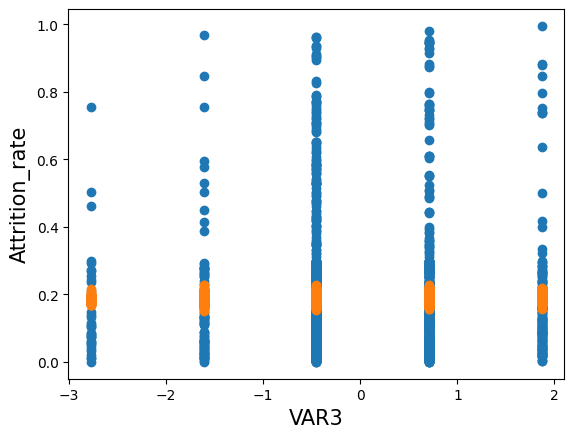

In [25]:
y_pred = model.predict(X_test)
plt.scatter(X_test['VAR3'], y_test)
plt.scatter( X_test['VAR3'] , y_pred  );
plt.ylabel("Attrition_rate", fontsize=15)
plt.xlabel("VAR3", fontsize=15)
plt.show()

In [24]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
#По метрикам видно, что модель работает очень плохо, так как параметр R2 отрицателбный.

Mean Absolute Error: 0.12853373310000524
Mean Squared Error: 0.03535198615113226
R2 score: -0.004162053510782915
